-> The objective of this project is to build a machine learning model that can accurately detect fraudulent credit card transactions. With the increase in online payments, credit card fraud has become a major concern. This system aims to help financial institutions identify and prevent fraud by analyzing transaction patterns.



In [2]:
import numpy as np
import pandas as pd

Imports the essential Python libraries:

-> numpy for numerical operations,

-> pandas for data manipulation and analysis.

In [3]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Source: Kaggle - Credit Card Fraud Detection Dataset

Records: 284,807 transactions

Features: 31 total features

V1 to V28: Principal components obtained via PCA (confidential)

Time: Seconds elapsed between each transaction and the first

Amount: Transaction amount

Class: Target variable (0 = Legitimate, 1 = Fraud)

-> find a Null values in and sum it all

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

df.isnull().sum()  using this, will find a sum of null values of each column.

-> in this we will show no one null in any column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

will use a info() functioan , well show DataType of each column, Non-Null Values etc..

-> for this we will analyse if we want to convert any non sutable data dype to usefull data type.

-> in this No need to change it.

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


-> describe() for thsi functioan we will show a mean, count, std, min value, max value, 25%, 50%, 75%, of each numeric column.

-> in this we will show a mean of Amount is 88.34.. it means average of amount will spent in credit card is 88.34.., and max of Amount is 25691.16.. is very high. 

-> and hear std is 250 is vert high.A high standard deviation means data points are spread out over a larger range of values.so it will effect on predect.

->25% means under 25% peoples are spent a amount of 5.600, 75% means 25 to 75% peoples are spent amount of 22, and 75% means more then 75% peoples are spent a amount is 77.165.., hear it is very small then max value. so We need to Scale it.

-> So hear we must be counsider a max value as outlier or not.

In [7]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

For this output we will seen mejority of cards is not a froud.Hear '0' will couiants Not a Froud, and '1' will couiants a Froud. for a clear vison we will change a names of it. 

In [19]:
import matplotlib.pylab as plt
import seaborn as sns

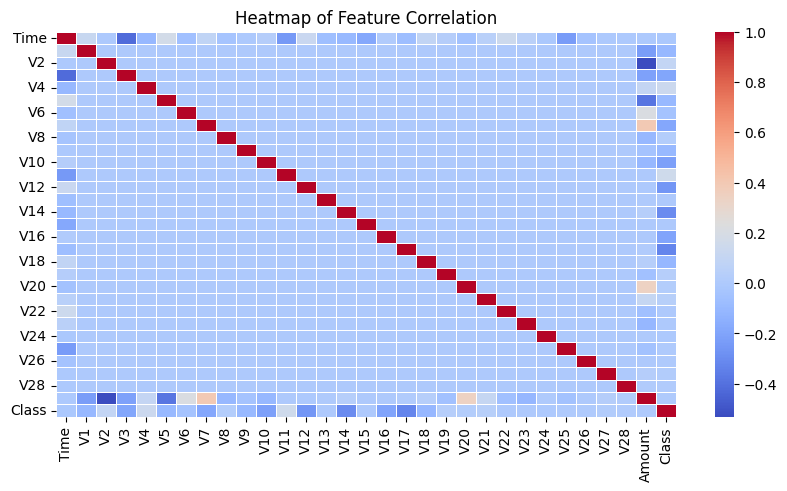

In [30]:

df['Class']=df['Class'].replace({'Not_Froud':0, 'Froud':1})
corr_matrix = df.corr()

plt.figure(figsize=(10, 5))  # Adjust size based on your dataset
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Heatmap of Feature Correlation')
plt.show()




-> for this heat map, it will show a correlation of each column in graphial visuals, hear shoe a Amount and Class is show a mejor  Relatioan of each other. 

In [27]:
df["Class"].corr(df["Amount"])

np.float64(0.005631753006768562)

-> hear it show a correlatioan of Class and Amount, it is 0.0056, it not a strong but compare to other is Good, so we will show that out Tatget Column is Mejorly Releted to Amount.

In [10]:
df['Class']=df['Class'].replace({0: 'Not_Froud',1: 'Froud'})

-> Hear we Will Replace a Class Numeric Values to Sutable Name, like "0" to "Not_Froud", and "1" to "Froud" For Clear Visuals.

In [11]:
df["Class"].value_counts()

Class
Not_Froud    284315
Froud           492
Name: count, dtype: int64

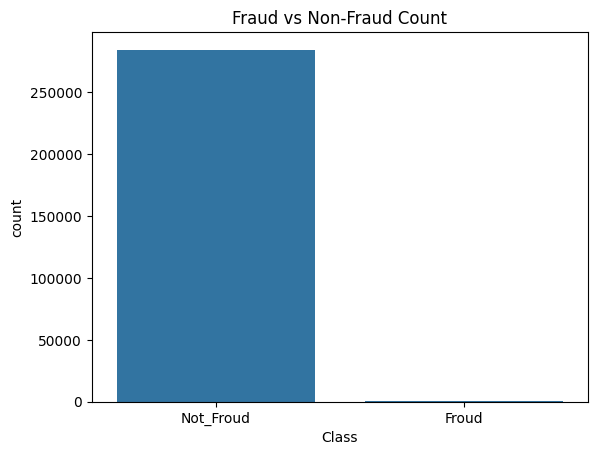

In [ ]:

sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Count")
plt.show()


-> hear it is a Graphicl Visual of Class Feature, it Will count of each unique values, Will show a Not_Froud valuess is very high.

In [64]:
from sklearn.preprocessing import StandardScaler
df["Amount"]=StandardScaler().fit_transform(df[["Amount"]])
df=df.drop(['Time'],axis=1)

-> hear StandardScaler is use to Scale a Values, when Difference of values is Very High So We need To Scale theem, Hear We show Amount Values is very High and Class Values is 0 or 1, So Gape of Them is very High so need To Scalr them.

->and Hear No need to Time Column Because, it Will Very low corr.. of Class, and No need to use it So Will Drop it.

In [72]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
from sklearn.model_selection import train_test_split

x = df.drop("Class",axis=1)
y = df["Class"]

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

-> Now split the data in to Train,Test splite,in margin of 80/20% means 80% of data is Train Data, and 20% data is Test data.

->will use a random_state to fix an Random Values it always same every time at run a code. if it will not get, so when run the code it will generate different random values to each split, so each split will train our model as different values.

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix
# RandomForest Regression
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

c:\Users\yashd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print("RandomForest Regression Report:\n",classification_report(y_test, y_pred))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

RandomForest Regression Report:
               precision    recall  f1-score   support

       Froud       0.96      0.77      0.85        98
   Not_Froud       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Logistic Regression Report:
               precision    recall  f1-score   support

       Froud       0.61      0.56      0.59        98
   Not_Froud       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.81      0.78      0.79     56962
weighted avg       1.00      1.00      1.00     56962

Decision Tree Report:
               precision    recall  f1-score   support

       Froud       0.70      0.83      0.76        98
   Not_Froud       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88

-> for this we will seen that precision of RandomForest is 0.96, so it will Excellent at detecting fraud with very few false alarms.

-> Logistic is 0.61 it wwill Weak performance for fraud, missed almost half of frauds.

-> and Decision Tree is 0.70, it will Good fraud recall, better than LR, slightly less precise than RF. 

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(" RandomForest Regression Accuracy: ", accuracy_score(y_test, y_pred))
print(" Logistic Regression Report: ", accuracy_score(y_test, y_pred_lr))
print(" Decision Tree Report: ", accuracy_score(y_test, y_pred_dt))

 RandomForest Regression Accuracy:  0.9995435553526912
 Logistic Regression Report:  0.9986306660580738
 Decision Tree Report:  0.9990871107053826


They will show That a RandomForest Regression is More Accurate of Another models.

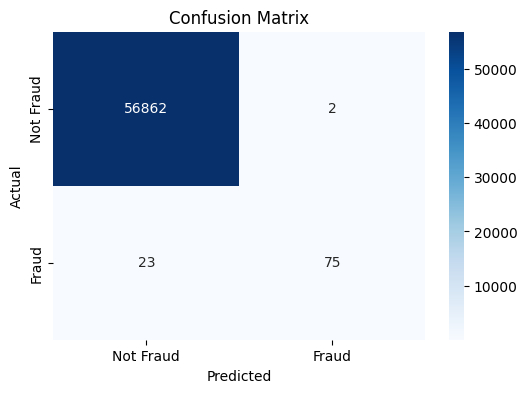

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap((confusion_matrix(y_test,y_pred)), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


-> For RaandomForest Regression

They will Sohow a Ratoo of "Not Frod"(Actual) to "Not Frod"(Predicted) is very Dark, means it Will Strong Reletion, it means majoyr of Predection is True.

->heat some Values are Actual is "Froud " and Prediction is "Not Froud" is 23.

->same hear some Values are Actual is " Not Froud " and Prediction is "Froud" is 2.

->same hear some Values are Actual is " Froud " and Prediction is "Froud" is 75.


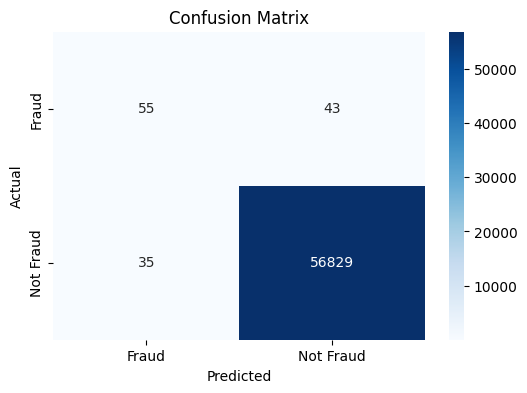

In [44]:
# For Logistic Regression
plt.figure(figsize=(6,4))
sns.heatmap((confusion_matrix(y_test,y_pred_lr)), annot=True, fmt='d', cmap='Blues', xticklabels=['Fraud', 'Not Fraud'], yticklabels=['Fraud', 'Not Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

-> For Logistic Regression

They will Sohow a Ratoo of "Not Frod"(Actual) to "Not Frod"(Predicted) is very Dark, means it Will Strong Reletion, it means majoyr of Predection is True.

->heat some Values are Actual is "Froud " and Prediction is "Not Froud" is 43.

->same hear some Values are Actual is " Not Froud " and Prediction is "Froud" is 35.

->same hear some Values are Actual is " Froud " and Prediction is "Froud" is 55.


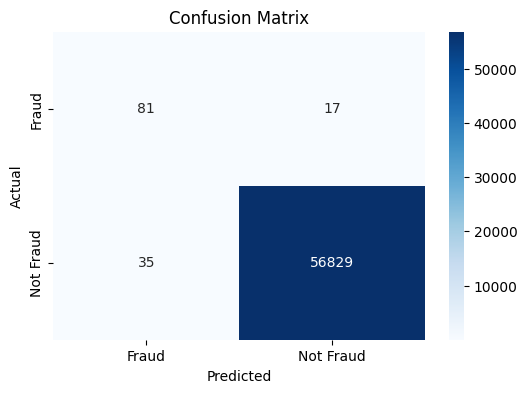

In [43]:
# For Decission Tree
plt.figure(figsize=(6,4))
sns.heatmap((confusion_matrix(y_test,y_pred_dt)), annot=True, fmt='d', cmap='Blues', xticklabels=['Fraud', 'Not Fraud'], yticklabels=['Fraud', 'Not Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

-> For Decision Tree

They will Sohow a Ratoo of "Not Frod"(Actual) to "Not Frod"(Predicted) is very Dark, means it Will Strong Reletion, it means majoyr of Predection is True.

->heat some Values are Actual is "Froud " and Prediction is "Not Froud" is 17.

->same hear some Values are Actual is " Not Froud " and Prediction is "Froud" is 35.

->same hear some Values are Actual is " Froud " and Prediction is "Froud" is 81.


In [98]:

sample_input = [[12545.0, -2.409983, 1.958081, -1.508359, 4.125768, -0.594457, -1.532303,
 -2.497268, 1.564475, -2.731956, -2.862587, 3.501620, -3.103711,
 -0.511577, -4.353131, 0.376202, -1.080703, -2.850956, -0.079499,
 0.406617, 0.679321, 1.612451, 1.936760, 0.954132, 0.028114,
 0.073342, 0.274552, 0.834449, 1.401275, 0.01]]
  # Last is 'Amount'



for test this model will enter a Sample data (30 features: Time, V1-V28, Amount)

In [99]:
scaler = StandardScaler()
scaler.fit(x_train)  
scaled_input = scaler.transform(sample_input)


c:\Users\yashd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


-> Scale the Sample Data and Fit on training data

In [103]:
prediction = dt.predict(scaled_input)

if prediction[0] == 1:
    print(" Fraudulent Transaction Detected!")
else:
    print(" Legitimate Transaction.")


 Legitimate Transaction.


c:\Users\yashd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
